# Exercício avaliativo

In [1]:
import io
import sqlite3
import pandas as pd

Neste exercício, vamos trabalhar com dados de uma empresa fictícia de consultoria denominada IBD.

**Considere o seguinte esquema relacional**:

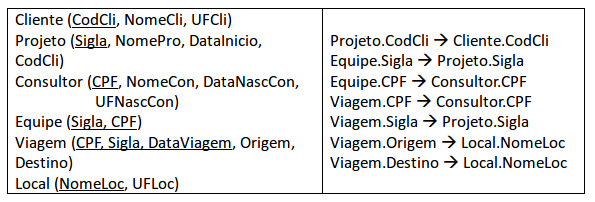

**assumindo as seguintes premissas**:

- Nenhum atributo admite valor nulo.
- Apenas as seguintes chaves primárias são numéricas: `Cliente.CodCli`, `Consultor.CPF`

# Download dos dados da empresa

In [16]:
!curl -s -o /tmp/EX4.sql https://raw.githubusercontent.com/filipefbn/jupyter_intro_class_ibd/master/data/exercicio.sql

# Carregando o banco

In [17]:
conn = sqlite3.connect('/tmp/consult.db')
cursor = conn.cursor()

f = io.open('/tmp/EX4.sql', 'r', encoding='utf-8')
sql = f.read()
cursor.executescript(sql)

# Consultas

Responda as perguntas abaixo através de consultas SQL no banco de dados carregado. Caso tenha alguma dúvida sobre `sqlite3` e `pandas`, revisite as **seções 2 e 3**  do [Tutorial: SQL, Google Colab e Jupyter Notebooks](https://colab.research.google.com/drive/1DnDPcgdq6YcBI3AnzRRCfMRvp2nU3vAV?usp=sharing).

O formato da célula de resposta pode ser visto na resposta da consulta exemplo 0.

**Você pode usar mais de uma célula para responder, desde que a última célula antes da próxima consulta contenha a resposta final no formato mostrado no exemplo 0.** 

## 0. [exemplo/não alterar]  Qual o nome e o número de viagens dos 5 consultores que mais viajaram a trabalho pela empresa IBD?

In [21]:
query = """
SELECT 
  C.NomeCon as Nome, COUNT(C.CPF) as NViagens
FROM 
  Consultor as C
INNER JOIN Viagem as V
  ON C.CPF = V.CPF
GROUP BY
  C.CPF
ORDER BY
  NViagens DESC
LIMIT 5
"""

df = pd.read_sql_query(query, conn)
df

,Nome,NViagens
0,Melissa Carvalho Cunha,4
1,Rodrigo Araujo Cardoso,3
2,Larissa Fernandes Araujo,3
3,Diogo Cavalcanti Rocha,2
4,Lucas Fernandes Costa,1


## 1. Que consultores (CPF, nome e estado de nascimento) não nasceram em São Paulo (SP)?

In [23]:
query1 = """
        SELECT CPF, NomeCon as Nome, UFNascCon as Estado
        FROM Consultor
        WHERE UFNascCon="SP"
        """
df = pd.read_sql_query(query1, conn)
df

,CPF,Nome,Estado
0,44434353608,Melissa Carvalho Cunha,SP
1,62465487841,Lucas Fernandes Costa,SP
2,34646193892,Rodrigo Araujo Cardoso,SP


## 2. Que projetos (sigla e nome) não são do cliente "Facebook"?

In [32]:
query2 = """
        SELECT Sigla as Sigla, NomePro as Nome
        FROM Projeto
        INNER JOIN Cliente
            ON Projeto.CodCli = Cliente.CodCli
            WHERE Cliente.NomeCli <> "Facebook"
        """
df = pd.read_sql_query(query2, conn)
df

,Sigla,Nome
0,NMT,Neural Machine Translation (Chinês para Portug...
1,Search,Otimização Sistema de Busca
2,Spam,Detecção de Spam (Gmail)
3,Fake,Detecção de Fake News
4,SDC,Self Driving Car
5,Pay,Sistema de Pagamento
6,RecSys,Sistema de Recomendação
7,Fraud,Detecção de Fraude


## 3. Para que UFs viajaram os consultores que participam do projeto de sigla "RecSys"?

In [40]:
query3 = """
        SELECT Local.UFLoc as UF
        FROM Local
        INNER JOIN Viagem
            ON Local.NomeLoc = Viagem.Destino
            INNER JOIN Consultor
                ON Viagem.CPF = Consultor.CPF
                INNER JOIN Projeto
                    ON Viagem.sigla = Projeto.sigla
                    WHERE Projeto.sigla = "RecSys"
        GROUP BY Local.UFLoc
        """
df = pd.read_sql_query(query3, conn)
df

,UF
0,MG
1,SP


## 4. Que projetos (sigla e nome) não têm equipe?

In [56]:
query4 = """
        SELECT Projeto.Sigla as Sigla, NomePro as Nome
        FROM Projeto
        LEFT JOIN Equipe
            ON Projeto.Sigla = Equipe.Sigla
            WHERE Equipe.Sigla IS NULL
        GROUP BY Projeto.Sigla
        """
df = pd.read_sql_query(query4, conn)
df

,Sigla,Nome
0,Fake,Detecção de Fake News
1,SDC,Self Driving Car
2,Search,Otimização Sistema de Busca


## 5. Que projetos (sigla e nome) não têm em sua equipe consultores nascidos antes de 1987?


In [51]:
query5 = """
        SELECT Projeto.Sigla as Sigla, NomePro as Nome
        FROM Projeto
        LEFT JOIN Equipe
            ON Projeto.Sigla = Equipe.Sigla
            INNER JOIN Consultor
                ON Equipe.CPF = Consultor.CPF
                WHERE Consultor.DataNascCon < "1987"
        GROUP BY Projeto.Sigla
        """
df = pd.read_sql_query(query5, conn)
df

,Sigla,Nome
0,Pay,Sistema de Pagamento
1,RecSys,Sistema de Recomendação
2,WhatsApp,Cliente desktop para o WhatsApp


## 6. Que consultores (CPF e nome) viajaram por seu estado natal (origem ou destino)?

In [54]:
query6 = """
        SELECT CONSULTOR.CPF, NOMECON as Nome
        FROM CONSULTOR
                 INNER JOIN VIAGEM
                            ON CONSULTOR.CPF = VIAGEM.CPF
                 INNER JOIN LOCAL
                            ON DESTINO = NOMELOC OR ORIGEM = NOMELOC
        WHERE (UFNASCCON = UFLOC
            OR UFNASCCON = UFLOC)
        GROUP BY CONSULTOR.CPF
        """
df = pd.read_sql_query(query6, conn)
df

,CPF,Nome
0,17787063122,Larissa Fernandes Araujo
1,29762035631,Caio Dias Ribeiro
2,34646193892,Rodrigo Araujo Cardoso
3,44434353608,Melissa Carvalho Cunha
4,62465487841,Lucas Fernandes Costa


## 7. Para que locais não houve nenhuma viagem?



In [57]:
query7 = """
        SELECT NOMELOC as Local
        FROM LOCAL
                 LEFT JOIN VIAGEM
                           ON NOMELOC = VIAGEM.ORIGEM OR NOMELOC = VIAGEM.DESTINO
        WHERE VIAGEM.ORIGEM IS NULL
        GROUP BY NOMELOC
        """
df = pd.read_sql_query(query7, conn)
df

,Local
0,Amazon
1,Netflix
2,Spotify


## 8. Em que projetos (sigla e nome) foram realizadas viagens para a California (CA) desde o início de 2019?

In [58]:
query8 = """
        SELECT PROJETO.SIGLA as Sigla, NOMEPRO as Nome
        FROM PROJETO
                 INNER JOIN VIAGEM
                            ON PROJETO.SIGLA = VIAGEM.SIGLA
                 INNER JOIN LOCAL
                            ON NOMELOC = VIAGEM.ORIGEM OR NOMELOC = VIAGEM.DESTINO
        WHERE UFLOC = 'CA'
          AND DATAVIAGEM > '2019'
        GROUP BY PROJETO.SIGLA
        """
df = pd.read_sql_query(query8, conn)
df

,Sigla,Nome
0,VR,Hardware para Oculus VR
1,WhatsApp,Cliente desktop para o WhatsApp


## 9. Que consultores (CPF e nome) viajaram por um projeto de cuja equipe não fazem parte?

In [60]:
query9 = """
        SELECT CONSULTOR.CPF, NOMECON as Nome
        FROM CONSULTOR
                 INNER JOIN VIAGEM
                            ON CONSULTOR.CPF = VIAGEM.CPF
                 LEFT JOIN EQUIPE
                           ON VIAGEM.SIGLA = EQUIPE.SIGLA AND CONSULTOR.CPF = EQUIPE.CPF
        WHERE EQUIPE.SIGLA IS NULL
        """
df = pd.read_sql_query(query9, conn)
df

,CPF,Nome
0,34646193892,Rodrigo Araujo Cardoso
1,44434353608,Melissa Carvalho Cunha


## 10. Que consultores (CPF e nome) não estão em nenhuma equipe de projeto que tenha iniciado em 2019?


In [61]:
query10 = """
        SELECT CONSULTOR.CPF, NOMECON as Nome
        FROM CONSULTOR
                 LEFT JOIN
             (
                 SELECT EQUIPE.CPF
                 FROM EQUIPE
                          INNER JOIN PROJETO
                                     ON EQUIPE.SIGLA = PROJETO.SIGLA AND PROJETO.DATAINICIO LIKE "2019%"
             ) E ON CONSULTOR.CPF = E.CPF
        WHERE E.CPF IS NULL
        GROUP BY CONSULTOR.CPF
        """
df = pd.read_sql_query(query10, conn)
df

,CPF,Nome
0,3074973994,Julieta Maciel Sousa
1,13414263351,Samuel Araujo Azevedo
2,17787063122,Larissa Fernandes Araujo
3,29762035631,Caio Dias Ribeiro
4,31266012516,Leonor Goncalves Rocha
5,34646193892,Rodrigo Araujo Cardoso
6,62465487841,Lucas Fernandes Costa
7,85726311353,Brenda Oliveira Goncalves
